# **Introduction to Portfolio Analysis in Python**

## **Chapter 2 - Risk and Return**

**Annualizing portfolio returns**

Suppose you invested $101 at the beginning of 2015 in a portfolio. By the end of March 2018, you wonder how your portfolio has performed over time, and whether it is as good as another portfolio which started trading mid-2016. What performance metric do you look at? Well, the annualized return of course!

So let's calculate the annualized rate of return for your portfolio. Since our sample covers 3.2 years, let's use the monthly denomination in the formula for annualized returns. The number of months is already given under months.

Available are the data on portfolio returns under pf_returns, as well as as a separate series pf_AUM containing the portfolio's value, or assets under management (AUM). Good luck!

In [1]:
import pandas as pd

In [3]:
pf_AUM = pd.read_csv("pf_AUM.csv")
pf_AUM.head()

,date,pf_AUM
0,2015-01-02,101.000000
1,2015-01-05,99.667161
2,2015-01-06,98.088336
3,2015-01-07,99.042098
4,2015-01-08,101.637547


In [4]:
pf_AUM = pf_AUM.set_index('date')
pf_AUM.head()

,pf_AUM
date,
2015-01-02,101.000000
2015-01-05,99.667161
2015-01-06,98.088336
2015-01-07,99.042098
2015-01-08,101.637547


In [7]:
pf_AUM = pf_AUM.squeeze()

In [8]:
print(type(pf_AUM))

<class 'pandas.core.series.Series'>


In [10]:
months = 38

# Calculate total rate of return from start to end
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print (annualized_return)

0.19623938683051412


**Comparing annualized rates of return**

In the last exercise, you saw that the annualized rate of return was 19.6%. That's pretty high! But since your portfolio consists of only 4 stocks, this high return is indeed possible as it is not very diversified. Let's compare the portfolio's annual rate of return, with that of the S&P500, which is much more diversified.

The value of the S&P500 between 1st of January 2015 and end of December 2018 has been made available. That's 4 years of data. You have full years this time, so use the year denomination in the formula for the annualized return. The data is stored under sp500_value.

In [23]:
sp500_value = pd.read_csv("sp500.csv")
sp500_value.head()

,date,S&P500
0,2015-01-02,2058.199951
1,2015-01-05,2020.579956
2,2015-01-06,2002.609985
3,2015-01-07,2025.900024
4,2015-01-08,2062.139893


In [24]:
sp500_value = sp500_value.set_index('date')
sp500_value = sp500_value.loc['2015-01-02':'2018-12-31'].squeeze()

In [25]:
sp500_value

date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2018-12-24    2351.100098
2018-12-26    2467.699951
2018-12-27    2488.830078
2018-12-28    2485.739990
2018-12-31    2506.850098
Name: S&P500, Length: 1006, dtype: float64

In [26]:
# Calculate the total return from the S&P500 value series
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print (annualized_return)

0.21798180822131397
0.050534212239337295


**Interpreting the Sharpe ratio**

In the video, you saw that the Sharpe ratio of the Apple stock was below 1, namely 0.64. Remember, the Sharpe ratio represents the return proportional to risk, so how do you interpret a Sharpe ratio of 0.64? Which of the below statements is correct?

**Answer**

A Sharpe ratio of 1 and up indicates that the returns on investment are proportional to the risk taken. A Sharpe ratio lower than 1 indicates that return on investment is less than the risk taken.

**S&P500 Sharpe ratio**

In this exercise, you're going to calculate the Sharpe ratio of the S&P500, starting with pricing data only. In the next exercise, you'll do the same for the portfolio data, such that you can compare the Sharpe ratios of the two.

Available for you is the price data from the S&P500 under sp500_value. The risk-free rate is available under rfr, which is conveniently set to zero. Let's give it a try!

In [28]:
import numpy as np
rfr = 0

# Calculate total return and annualized return from price data
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]

# Annualize the total return over 4 year
annualized_return = ((1 + total_return)**(1/4))-1

# Create the returns data
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

0.3712937456643837


**Portfolio Sharpe ratio**

In this exercise you are now going to calculate the Sharpe ratio of the portfolio. How do you think the portfolio Sharpe ratio will be different to the S&P500 Sharpe ratio? You'll find out in this exercise.

You have the portfolio value over time under pf_AUM and the number of months for that data under months. Last, the risk-free rate is available under rfr, which is still set to zero.

In [33]:
months = 48

# Calculate total return and annualized return from price data
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize the total return over 4 year
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

0.7846293748029132


**Skewness of the S&P500**

We already know from the video that the S&P500 should be normally distributed, without too much skewness (when you have enough data). However, since you're working with a short data sample spanning only a few years, there might actually be some skewness in your sample. To make you aware of this potential sample skewness, let's plot the data and have a look.

The returns data from the S&P500 is available as returns_sp500.

In [36]:
sp500_value_full = pd.read_csv("sp500.csv")
sp500_value_full = sp500_value_full.set_index('date')
sp500_value_full = sp500_value_full.squeeze()

returns_sp500 = sp500_value_full.pct_change()
returns_sp500

date
2015-01-02         NaN
2015-01-05   -0.018278
2015-01-06   -0.008893
2015-01-07    0.011630
2015-01-08    0.017888
                ...   
2019-03-13    0.006950
2019-03-14   -0.000868
2019-03-15    0.004985
2019-03-18    0.003706
2019-03-19   -0.000131
Name: S&P500, Length: 1059, dtype: float64

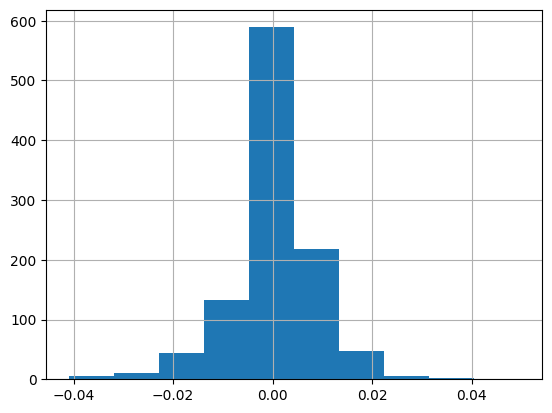

In [38]:
import matplotlib.pyplot as plt

# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist()
plt.show()

**Question**

Looking at the histogram of the S&P500 returns, what can you say about the skewness in this data?

**Answer**

The S&P 500 data has a negative skew; the mean is to the left of the mode and median, this data has more positive returns compared to a normal distribution with a mean of zero.

**Calculating skewness and kurtosis**

You just saw the histogram of the S&P500 data, let's now put it into numbers and calculate skewness and kurtosis. For the full picture of the distribution, you'll also look at the mean and standard deviation. Available are the S&P500 returns data under returns_sp500, which is all you need for this.

In [39]:
# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

mean :  0.03389998442910263
Std. dev  :  0.8610018502291801
skew :  -0.3831994518762794
kurt :  3.9223911008585053


**Comparing distributions of stock returns**

Let's have a look at how you can use skewness and kurtosis in your investment decisions. In this exercise you're going to compare the distributions of singular stocks with the portfolio, and see whether combining multiple stocks in a portfolio improves your returns distribution.

In [43]:
data = pd.read_csv("small_portfolio.csv")
data = data.set_index('date')
stock_returns = data.pct_change()
stock_returns

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436
...,...,...,...,...
2018-03-21,0.017595,0.000872,-0.006979,-0.016218
2018-03-22,-0.038184,-0.041747,-0.029087,-0.008178
2018-03-23,-0.020974,-0.026739,-0.029068,-0.006544


array([[<Axes: title={'center': 'GE'}>, <Axes: title={'center': 'JPM'}>],
       [<Axes: title={'center': 'MSFT'}>, <Axes: title={'center': 'PG'}>]],
      dtype=object)

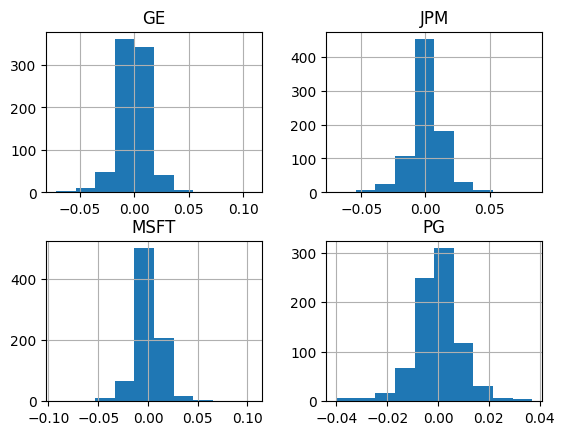

In [44]:
# Print the histograms of the stocks in the portfolio
stock_returns.hist()

In [45]:
# Print skewness and kurtosis of the stocks
print ("skew : ", stock_returns.skew())
print ("kurt : ", stock_returns.kurtosis())

skew :  GE      0.177313
JPM     0.018815
MSFT    0.515431
PG     -0.259934
dtype: float64
kurt :  GE      7.766370
JPM     3.831448
MSFT    9.882177
PG      2.848092
dtype: float64


In [51]:
weights = np.array([0. , 0.2, 0.7, 0.1])
pf_returns = stock_returns.dot(weights)
pf_returns

date
2015-01-02         NaN
2015-01-05   -0.013196
2015-01-06   -0.015841
2015-01-07    0.009723
2015-01-08    0.026206
                ...   
2018-03-21   -0.006333
2018-03-22   -0.029528
2018-03-23   -0.026350
2018-03-26    0.059820
2018-03-27   -0.034245
Length: 813, dtype: float64

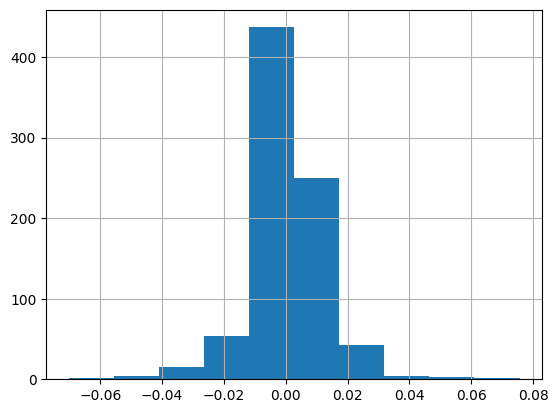

skew :  0.24634690384169408
kurt :  6.651785261134709


In [52]:
# Print the histogram of the portfolio
pf_returns.hist()
plt.show()

# Print skewness and kurtosis of the portfolio
print ("skew : ", pf_returns.skew())
print ("kurt : ", pf_returns.kurtosis())

**Sortino ratio**

For this exercise, the portfolio returns data are stored in a DataFrame called df, which you'll use to calculate the Sortino ratio. The Sortino ratio is just like the Sharpe ratio, except for that it uses the standard deviation of the negative returns only, and thereby focuses more on the downside of investing.

Let's see how big the Sortino ratio is compared to the earlier calculated Sharpe ratio. The risk-free rate rfrand the target return target are already defined and are both zero.

In [60]:
df = pf_returns.to_frame()
df = df.set_axis(['pf_returns'], axis='columns')
df

,pf_returns
date,
2015-01-02,NaN
2015-01-05,-0.013196
2015-01-06,-0.015841
2015-01-07,0.009723
2015-01-08,0.026206
...,...
2018-03-21,-0.006333
2018-03-22,-0.029528
2018-03-23,-0.026350


In [62]:
target = 0

# Create a downside return column with the negative returns only
downside_returns = df.loc[df['pf_returns'] < target]

# Calculate expected return and std dev of downside
expected_return = df['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  0.07742352765097255
Downside risk   :  0.8909195993692567
Sortino ratio :  0.0869029345698377


**Maximum draw-down portfolio**

In this exercise, you'll learn how to calculate the maximum draw-down of the S&P500 (also known as "peak to trough performance drop"). Maximum draw-down is an incredibly insightful risk measure. It tells you what has been the worst performance of the S&P500 in the past years.

It is the reason why many investors shy away from crypto-currencies; nobody likes to lose a large percentage of their investment (e.g., 70%) in a short period.

In order to calculate the maximum draw-down of the S&P500, the daily S&P500 prices have been made available to you in a DataFrame called df.

In [124]:
df = pd.read_csv("sp500.csv")
df = df.set_index('date')
df

,S&P500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2019-03-13,2810.919922
2019-03-14,2808.479980
2019-03-15,2822.479980


In [125]:
# Calculate the max value
roll_max = df.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

max_daily_draw_down

,S&P500
date,
2015-01-02,0.000000
2015-01-05,-0.018278
2015-01-06,-0.027009
2015-01-07,-0.027009
2015-01-08,-0.027009
...,...
2019-03-13,-0.197782
2019-03-14,-0.197782
2019-03-15,-0.197782


In [126]:
from datetime import datetime, timedelta
from datetime import date

start = date(2015, 1, 2)
dates = [start + timedelta(n) for n in range(len(df.index))]
len(dates)

1059

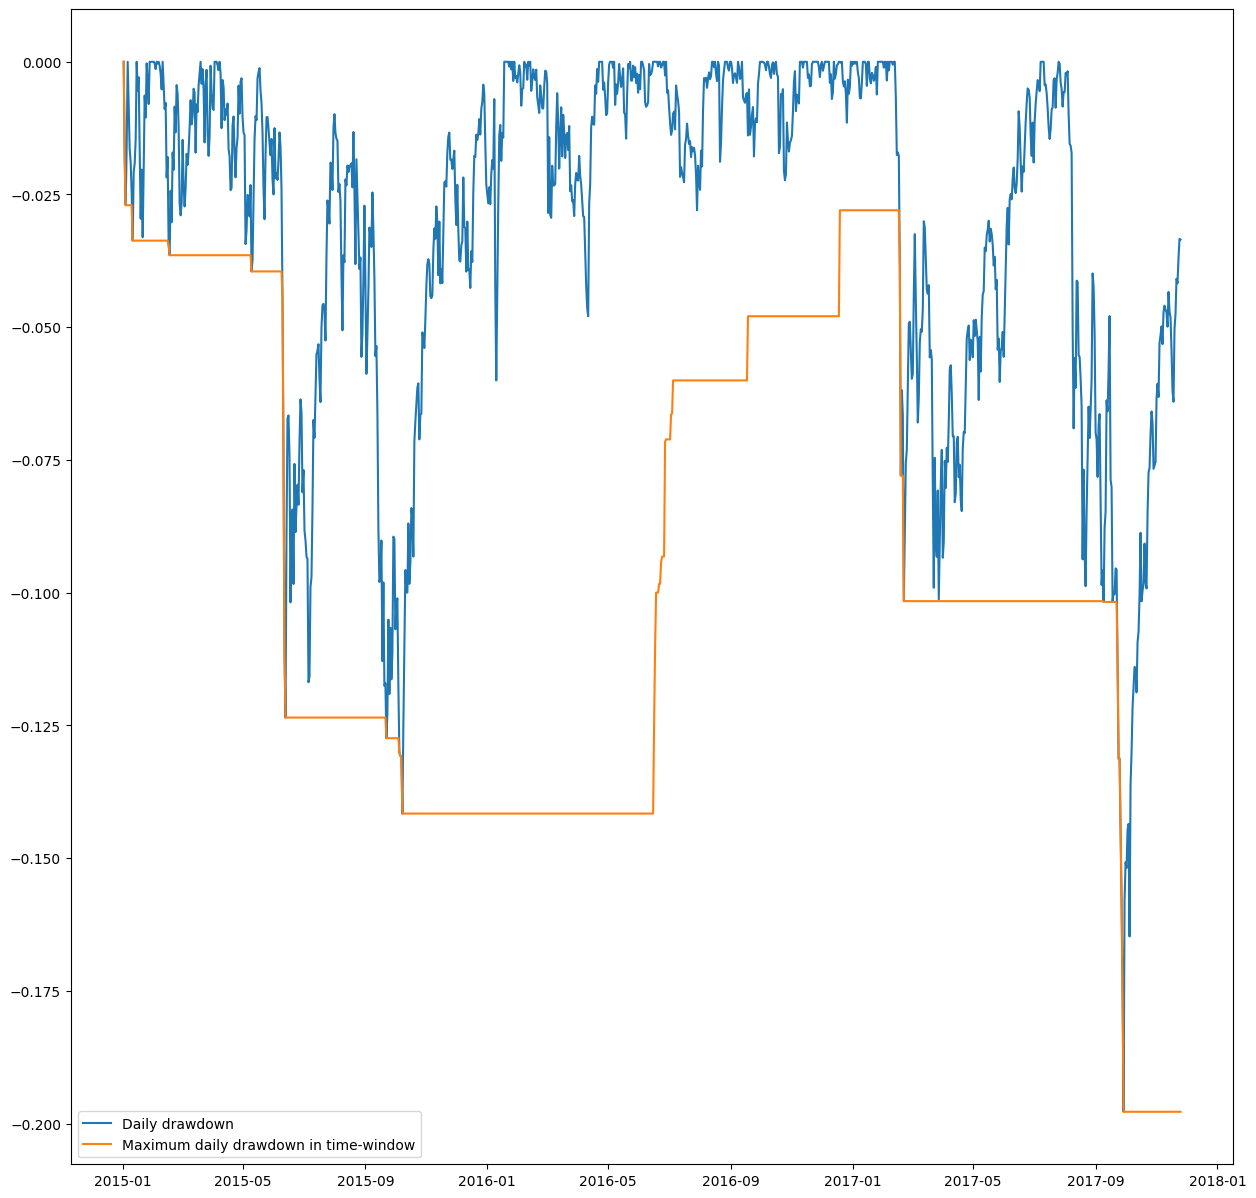

In [127]:
# Plot the results
plt.figure(figsize=(15,15))
plt.plot(dates, daily_draw_down, label='Daily drawdown')
plt.plot(dates, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()